In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ascvd-heart-risk/heartRisk.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/ascvd-heart-risk/heartRisk.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isMale          1000 non-null   int64  
 1   isBlack         1000 non-null   int64  
 2   isSmoker        1000 non-null   int64  
 3   isDiabetic      1000 non-null   int64  
 4   isHypertensive  1000 non-null   int64  
 5   Age             1000 non-null   int64  
 6   Systolic        1000 non-null   int64  
 7   Cholesterol     1000 non-null   int64  
 8   HDL             1000 non-null   int64  
 9   Risk            1000 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 78.2 KB


In [5]:
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1


# Data is very clean and ready for EDA and training

In [6]:
df.isnull().sum()

isMale            0
isBlack           0
isSmoker          0
isDiabetic        0
isHypertensive    0
Age               0
Systolic          0
Cholesterol       0
HDL               0
Risk              0
dtype: int64

# Broad correlation searching

<AxesSubplot:>

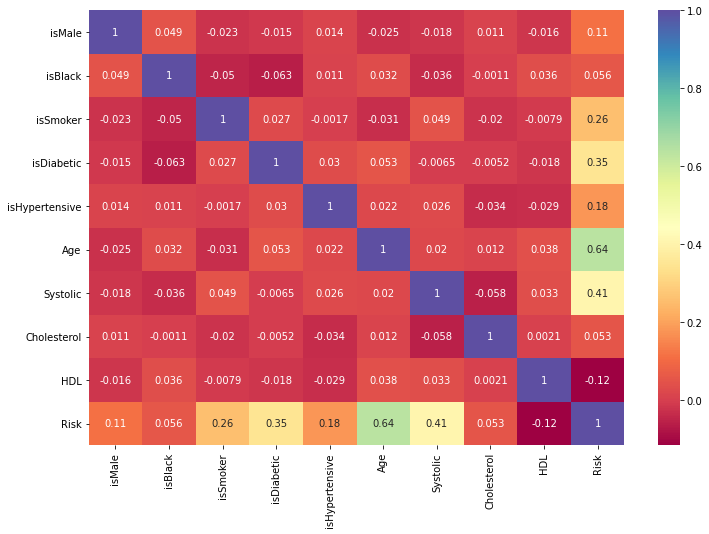

In [7]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Spectral')

# no strong correlations between features

# Correlations in order of greatest to least risk: Age, Systolic blood pressure, Diabetic, Smoker, High blood pressure, gender is male

<AxesSubplot:xlabel='isSmoker', ylabel='count'>

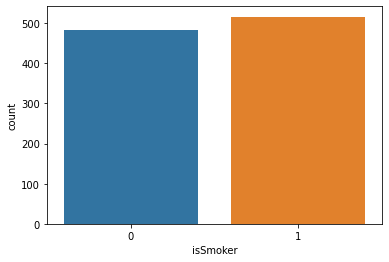

In [8]:
# near even split between smokers and nonsmokers
sns.countplot(x = 'isSmoker', data = df)

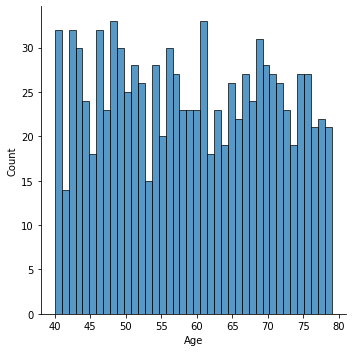

In [9]:
# reasonable represenation of ages between 40 and 80 within dataset
sns.displot(x = 'Age', data = df, bins = 40)

<AxesSubplot:xlabel='isMale', ylabel='count'>

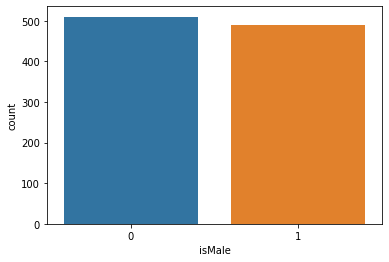

In [10]:
# close to even split between male and female subjects
sns.countplot(x = 'isMale', data = df)

<AxesSubplot:xlabel='isBlack', ylabel='count'>

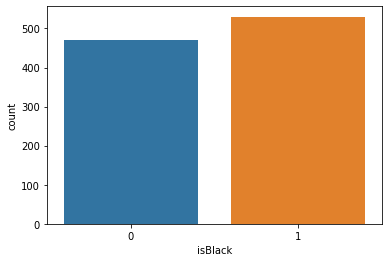

In [11]:
# data is slighlty more skewed towards the black population
sns.countplot(x = 'isBlack', data = df)

<AxesSubplot:xlabel='isDiabetic', ylabel='count'>

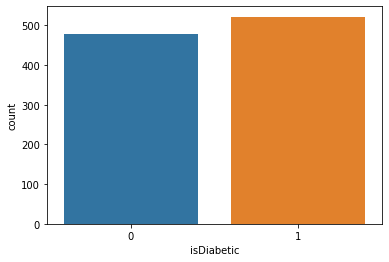

In [12]:
# slightly more diabetics in dataset than non
sns.countplot(x = 'isDiabetic', data = df)

<AxesSubplot:xlabel='isHypertensive', ylabel='count'>

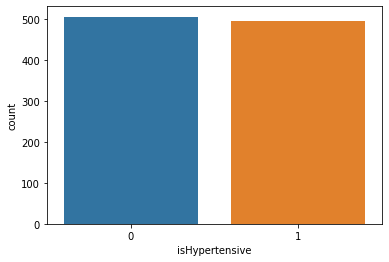

In [13]:
# even split between high and low blood presures.
sns.countplot(x = 'isHypertensive', data = df)

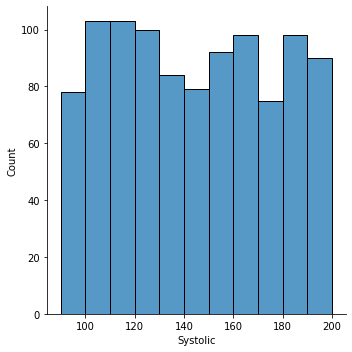

In [14]:
# even range of blood pressures
sns.displot(x = 'Systolic', data = df)

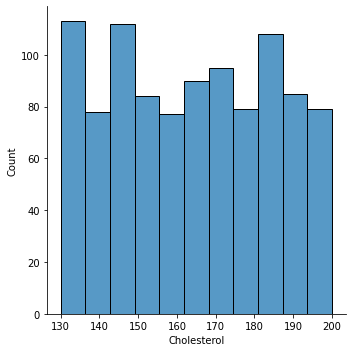

In [15]:
# data slightly skewed towards lower cholesterols
sns.displot(x = 'Cholesterol', data = df)

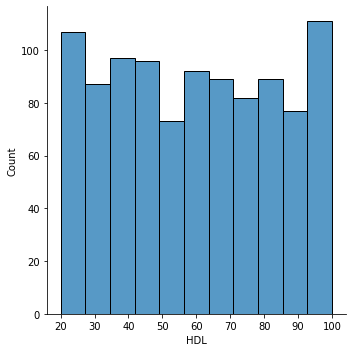

In [16]:
# data slightly skewed towards lower cholesterols
sns.displot(x = 'HDL', data = df)

# numerical data skew

In [17]:
# positive skew corresponds to the false column in categorical data
df.skew()

isMale            0.040068
isBlack          -0.120397
isSmoker         -0.064129
isDiabetic       -0.088218
isHypertensive    0.020031
Age               0.028857
Systolic          0.050021
Cholesterol       0.017371
HDL               0.033768
Risk              1.129501
dtype: float64

# Data is clean, evenly distributed and not wildly scaled. We're ready for regression prediction of the risk.

In [18]:
# data split

X = df.drop('Risk', axis = 1)
y = df['Risk']

In [19]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# training regression models

In [20]:
# Linear Regression training

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [21]:
# Linear Regression evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print(lr_mae, lr_rmse, lr_r2)

5.826303368977335 7.675867055411106 0.8063221229048128


In [22]:
# Decision Tree Regressor training

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

In [23]:
#Decision tree evaluation

dtr_mae = mean_absolute_error(y_test, dtr_pred)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_pred))
dtr_r2 = r2_score(y_test, dtr_pred)

print(dtr_mae, dtr_rmse, dtr_r2)

7.628666666666668 10.713250362673941 0.6227166529989041


In [24]:
# Random Forest training 

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [25]:
#Random forest evaluation

rfr_mae = mean_absolute_error(y_test, rfr_pred)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))
rfr_r2 = r2_score(y_test, rfr_pred)

print(rfr_mae, rfr_rmse, rfr_r2)

5.190524999999998 6.98321686957379 0.8396990164845174


In [26]:
# XGBoost Regressor training

from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)

In [27]:
#XGBoost Regressor evaluation 

xgbr_mae = mean_absolute_error(y_test, xgbr_pred)
xgbr_rmse = np.sqrt(mean_squared_error(y_test, xgbr_pred))
xgbr_r2 = r2_score(y_test, xgbr_pred)

print(xgbr_mae, xgbr_rmse, xgbr_r2)

4.416171073257303 6.41286401068951 0.8648147873023397


In [31]:
results = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree Regressor',\
                                 'Random Forest Regressor', 'XGBoost Regressor'], 'MAE' :\
                      [lr_mae, dtr_mae, rfr_mae, xgbr_mae], 'RMSE' :\
                        [lr_rmse, dtr_rmse, rfr_rmse, xgbr_rmse], 'r2':\
                        [lr_r2, dtr_r2, rfr_r2, xgbr_r2]})

results

,Model,MAE,RMSE,r2
0,Linear Regression,5.826303,7.675867,0.806322
1,Decision Tree Regressor,7.628667,10.713250,0.622717
2,Random Forest Regressor,5.190525,6.983217,0.839699
3,XGBoost Regressor,4.416171,6.412864,0.864815


# XGBoost Regressor wins!